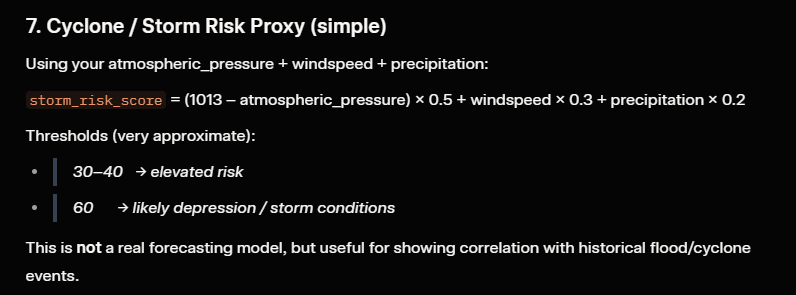

In [34]:
import pandas as pd

In [35]:
df_bandarban = pd.read_csv('../1980-2024-dataset/Bandarban_historical_weather_1980_2024.csv')

In [36]:
df_bandarban.describe()

,day,month,year,temperature(degree C),feels_like(degree C),max_temperature(degree C),minimum_temperature(degree C),humidity,precipitation,windspeed,atmospheric_pressure,UV,solar_radiation,dew_point
count,16437.000000,16437.000000,16437.000000,14764.000000,14764.000000,15149.000000,15149.000000,14764.000000,5479.000000,16052.000000,14687.000000,4038.000000,4038.000000,14764.00000
mean,15.730243,6.522723,2002.000000,26.154403,28.730046,28.828748,22.104964,77.653698,5.270944,16.795508,1008.469749,7.288014,199.868053,21.57968
std,8.800616,3.448865,12.988187,3.447506,5.633613,5.570366,5.675322,9.532762,12.367854,11.846019,5.035214,1.792979,59.791100,4.43595
min,1.000000,1.000000,1980.000000,6.100000,5.700000,0.000000,0.000000,8.200000,0.000000,0.000000,951.500000,0.000000,0.000000,-11.90000
25%,8.000000,4.000000,1991.000000,23.900000,24.100000,27.100000,19.100000,72.700000,0.000000,9.400000,1004.700000,7.000000,177.225000,17.90000
50%,16.000000,7.000000,2002.000000,27.200000,29.500000,30.100000,24.100000,78.900000,0.500000,16.600000,1008.900000,8.000000,204.400000,23.60000
75%,23.000000,10.000000,2013.000000,28.700000,33.300000,32.000000,26.100000,83.800000,6.050000,22.300000,1012.500000,8.000000,238.800000,25.10000
max,31.000000,12.000000,2024.000000,34.200000,44.300000,50.900000,34.100000,100.000000,316.100000,309.600000,1051.000000,10.000000,318.700000,28.80000


In [27]:
#  windspeed
desired_colmn = ['day', 'month', 'year', 'windspeed', 'humidity']

In [28]:
df_bandarban = df_bandarban[desired_colmn]

In [29]:
df_bandarban.describe()

,day,month,year,windspeed,humidity
count,16437.000000,16437.000000,16437.000000,16052.000000,14764.000000
mean,15.730243,6.522723,2002.000000,16.795508,77.653698
std,8.800616,3.448865,12.988187,11.846019,9.532762
min,1.000000,1.000000,1980.000000,0.000000,8.200000
25%,8.000000,4.000000,1991.000000,9.400000,72.700000
50%,16.000000,7.000000,2002.000000,16.600000,78.900000
75%,23.000000,10.000000,2013.000000,22.300000,83.800000
max,31.000000,12.000000,2024.000000,309.600000,100.000000


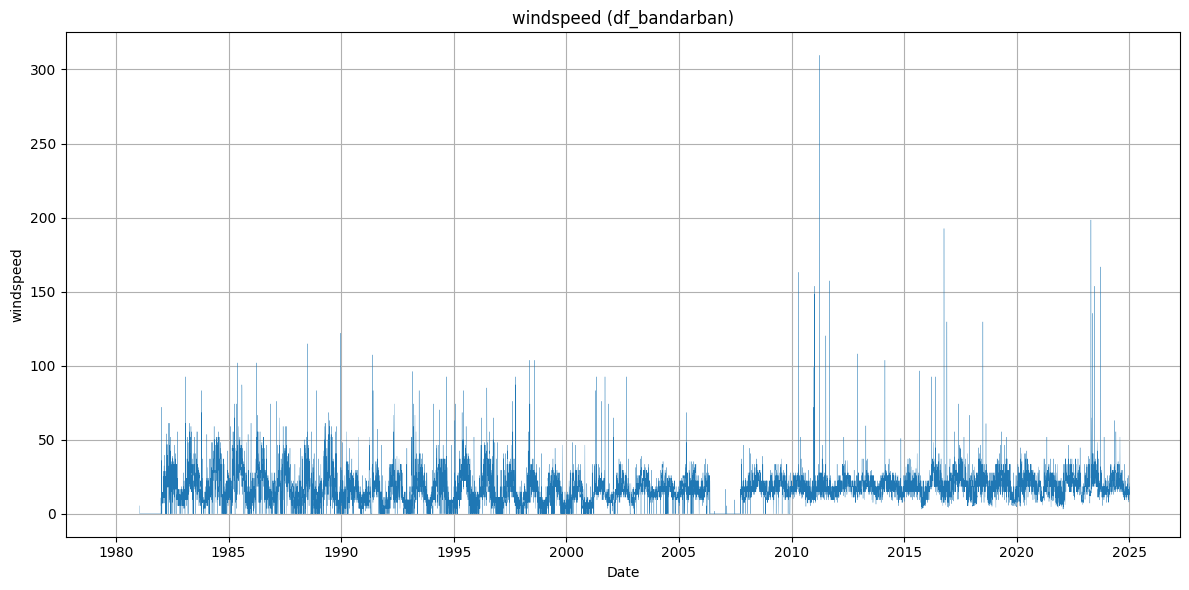

In [30]:
import matplotlib.pyplot as plt

if 'date' not in df_bandarban.columns:
    df_bandarban['date'] = pd.to_datetime(df_bandarban[['year','month','day']])

min_date = df_bandarban['date'].min()
max_date = df_bandarban['date'].max()

# plt.figure(flagsize = (12, 6))
plt.figure(figsize= (12, 6))
plt.plot(df_bandarban['date'], df_bandarban['windspeed'], linewidth=0.2)
plt.xlabel('Date')
plt.ylabel('windspeed')
plt.title('windspeed (df_bandarban)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
df_bandarban.head()

,day,month,year,windspeed,humidity,date
0,1,1,1980,NaN,NaN,1980-01-01
1,2,1,1980,NaN,NaN,1980-01-02
2,3,1,1980,NaN,NaN,1980-01-03
3,4,1,1980,NaN,NaN,1980-01-04
4,5,1,1980,NaN,NaN,1980-01-05


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit

df = df_bandarban.copy()
if 'date' not in df.columns:
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

df = df[
    (df['date'] >= '2020-01-01') & (df['date'] <= '2024-12-31')
]
# temp_col = 'temperature(degree C)'
hum_col = 'humidity'
# wind_col = 'wind_point'
wind_col = 'windspeed'

desired_col = ['day', 'month', 'year', wind_col]

df = df[desired_col].copy()


# adding lagging for 3 days
lags = [1, 2, 3]
lag_cols = []

for lag in lags:
    # df[f'temp_lag_{lag}'] = df[temp_col].shift(lag)
    
    df[f'wind_lag_{lag}'] = df[wind_col].shift(lag)
    df[f'hum_lag_{lag}'] = df[hum_col].shift(lag)
    lag_cols.extend([ f'hum_lag_{lag}',f'wind_lag_{lag}'])

# 7-day Rolling Average
# df['temp_roll_7'] = df[temp_col].transform(lambda x: x.rolling(window=7).mean())
df['hum_roll_7'] = df[hum_col].transform(lambda x: x.rolling(window=7).mean())
df['wind_roll_7'] = df[wind_col].transform(lambda x: x.rolling(window =7).mean())

rolling_cols = ['wind_roll_7','hum_roll_7']


df = df.dropna().reset_index(drop=True)


df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.sort_values('date').reset_index(drop=True)

df['day_of_year'] = df['date'].dt.dayofyear

def add_fourier_features(df,col,period,n_terms=10):
    for n in range(1, n_terms + 1):
        df[f'{col}_sin_{n}'] = np.sin(2 * np.pi * n * df.index / period)
        df[f'{col}_cos_{n}'] = np.cos(2 * np.pi * n * df.index / period)
    return df

df = add_fourier_features(df, 'day_of_year', period=365, n_terms=3)
fourier_cols = [c for c in df.columns if c.startswith('day_of_year_sin') or c.startswith('day_of_year_cos')]

FEATURES = ['day', 'month', 'year' ] + fourier_cols + lag_cols + rolling_cols
X = df[FEATURES]
y = pd.DataFrame({
    'windspeed': df[wind_col],
    'humidity': df[hum_col]
}).astype(float)    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

targets = y.columns
rf_model = {}
y_preds_rf = {}
rmses_rf = {} # eigula active korte hobe
r2s_rf = {}

for target in targets:
    rf_model = RandomForestRegressor(
        n_estimators= 800 ,
        random_state=42,
        max_depth=22,
        min_samples_split=2,
        min_samples_leaf=1,
        n_jobs=-1,
        max_features='sqrt'
    )
    rf_model.fit(X_train, y_train[target])

    y_pred = rf_model.predict(X_test)


    # model evaluation
    mse_rf = mean_squared_error(y_test[target], y_pred)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = r2_score(y_test[target], y_pred)

    print(f"\nRandom Forest Results for {target}:")
    print(f'MSE: {mse_rf:.4f}')
    print(f'RMSE: {rmse_rf:.4f}')
    print(f'R² Score: {r2_rf:.4f}')

    # k fold cross-validation 
    # Because you have included lags, "Shuffling" can be dangerous. It causes Data Leakage.

    tscv = TimeSeriesSplit(n_splits=5)

    rmse_list_rf = []
    for train_index, test_index in tscv.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        y_train_kf = y.iloc[train_index][target]
        y_test_kf = y.iloc[test_index][target]
        
        rf_model_kf = RandomForestRegressor(
            n_estimators= 800 ,
            random_state=42,
            max_depth=22,
            min_samples_split=2,
            min_samples_leaf=1,
            n_jobs=-1,
            max_features='sqrt'
        )

        rf_model_kf.fit(X_train_kf, y_train_kf)
        y_pred_kf_rf = rf_model_kf.predict(X_test_kf)

        mse_kf_rf = mean_squared_error(y_test_kf, y_pred_kf_rf)
        rmse_kf_rf = np.sqrt(mse_kf_rf)
        rmse_list_rf.append(rmse_kf_rf)
        average_rmse_rf = np.mean(rmse_list_rf)
        r2_kf_rf = r2_score(y_test_kf, y_pred_kf_rf)

    print(f"Average RMSE from K-Fold CV (Random Forest): {average_rmse_rf:.4f}")
    print(f"RMSEs from each fold (Random Forest): {rmse_list_rf}")
    print(f"K fold R²   : {r2_kf_rf:.4f}")
    print(f"K fold MSE  : {mse_kf_rf:.4f}")
    
# Feature importance for Random Forest
    importance = rf_model.feature_importances_
    feature_names = X.columns
    feature_importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
    feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
    print("\nRandom Forest Feature Importances:")
    print(feature_importance_df_rf)


KeyError: 'humidity'

In [2]:
rf_model_wind = rf_model

NameError: name 'rf_model' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import Adam, SGD

def create_sequences(x_data, y_data, window_size=5):
    X_seq, y_seq = [], []
    for i in range(window_size, len(x_data)):
        X_seq.append(x_data[i-window_size:i]) # Grab the previous 'n' days
        y_seq.append(y_data[i])               # The error of the CURRENT day
    return np.array(X_seq), np.array(y_seq)

# 1. Chronological Split (No Shuffling!)
train_size = int(len(df) * 0.8)

# These keep their column names (Good for RF)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# 2. Re-fit your RF models on X_train explicitly to ensure they "own" the names
# rf_model_temp.fit(X_train, y_train['temperature'])
# rf_model_hum.fit(X_train, y_train['humidity'])
rf_model_wind.fit(X_train, y_train['windspeed'])

# Get predictions on the training set using the DataFrames
# train_preds_temp = rf_model_temp.predict(X_train)
# train_preds_hum = rf_model_hum.predict(X_train)
train_preds_wind = rf_model_wind.predict(X_train)

# Calculate Residuals (Errors)
# res_temp = y_train['temperature'].values - train_preds_temp
# res_hum = y_train['humidity'].values - train_preds_hum
res_wind = y_train['windspeed'].values - train_preds_wind

# Combine into a single error target for the LSTM
train_residuals = np.column_stack([res_wind])

# 1. Scale the features for the LSTM
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)



# --- NEW SLIDING WINDOW BLOCK ---
window_size = 5  # You can try 3, 5, or 7

# Create sequences for training
X_train_lstm, train_residuals_seq = create_sequences(X_train_scaled, train_residuals, window_size)

# Create sequences for testing
X_test_lstm, _ = create_sequences(X_test_scaled, np.zeros((len(X_test_scaled), 0)), window_size)

# Update the LSTM Input Shape
lstm_model = Sequential([
    Input(shape=(window_size, X_train_lstm.shape[2])), # Updated: shape is now (5, features)
    LSTM(32, activation='tanh'), 
    Dense(16, activation='relu'),
    Dense(0) 
])
# Note: Use train_residuals_seq here instead of train_residuals
lstm_model.compile(optimizer='adam', loss='mae')
lstm_model.fit(X_train_lstm, train_residuals_seq, epochs=40, batch_size=32, verbose=1)

# --- UPDATED PREDICTION BLOCK ---
# We skip the first 'window_size' rows of X_test to match the LSTM output
X_test_aligned = X_test.iloc[window_size:]
y_test_aligned = y_test.iloc[window_size:]

# Get RF predictions on the ALIGNED test set
rf_w_pred = rf_model_wind.predict(X_test_aligned)


# Get LSTM corrections (These will already be aligned because of create_sequences)
corrections = lstm_model.predict(X_test_lstm)

# Combine
final_wind = rf_w_pred + corrections[:, 0]


print(f"Windowed Dew R2: {r2_score(y_test_aligned['windspeed'], final_wind):.4f}")

Epoch 1/40
